In [80]:
import turicreate as tc

# Load some house sales data

In [81]:
sales= tc.SFrame('datasets/Housedata')

In [82]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


In [83]:
# Exploring the data for housing sales
sales.show()

Materializing SFrame

Warning: Skipping column 'date'. Unable to show columns of type 'datetime'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

In [5]:
tc.show(sales[0:5000]['sqft_living'],sales[0:5000]['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Create a simple regression model of sqft_living to price

In [84]:
train_data,test_data= sales.random_split(.8,seed=0)

In [85]:
# Build the regression model
sqft_model= tc.linear_regression.create(train_data,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.008931     | 4345102.802307     | 2048708.866465       | 263752.140810                   | 247103.287474                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [86]:
# Evalute the simple model
test_data['price'].mean()

543054.0425632532

In [87]:
sqft_model.evaluate(test_data)

{'max_error': 4140120.7295868844, 'rmse': 255203.94563660724}

In [88]:
# Let's show what our predictions look like
import matplotlib.pyplot as plt
%matplotlib inline

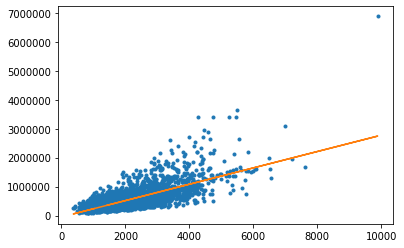

In [89]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],sqft_model.predict(test_data),'-')

In [90]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-48212.07254822098,5056.365026820406
sqft_living,None,282.4157070739471,2.2230980221067185


In [91]:
# Explore other features in the data
features= ['bedrooms','bathrooms','sqft_living','sqft_lot',
          'floors','zipcode']

In [28]:
sales[features].show()

Materializing SFrame

In [92]:
tc.show(sales['zipcode'],sales['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Build a regression model with more features

In [93]:
my_features= tc.linear_regression.create(train_data,target='price',features=features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.101452     | 4089395.877744     | 2059307.942395       | 189372.617017                   | 186973.959232                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [94]:
print (features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [95]:
print (sqft_model.evaluate(test_data))
print (my_features.evaluate(test_data))

{'max_error': 4140120.7295868844, 'rmse': 255203.94563660724}
{'max_error': 3204086.226714144, 'rmse': 180767.83607357802}


# Apply learned models to predict prices of 3 houses

In [96]:
house1 = sales[sales['id']=='5309101200']

In [97]:
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src='datasets/house_images/house1.png'>

In [98]:
print (house1['price'])

[620000.0, ... ]


In [99]:
print (sqft_model.predict(house1))

[629585.624429252]


In [100]:
print (my_features.predict(house1))

[729506.7815071829]


# Prediction for a second, fancier house

In [101]:
house2= sales[sales['id']=='1925069082']

In [102]:
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src='datasets/house_images/house2.jpg'>

In [58]:
print(sqft_model.predict(house2))

[1257245.1684697238]


In [105]:
print(my_features.predict(house2))

[1232816.6748692913]


# 3rd house prediction 

In [61]:
bill_gates= {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src='datasets/house_images/bill_gates.png'>

In [65]:
print (my_features.predict(tc.SFrame(bill_gates)))

[14896602.961966794]


# Assignment 

In [66]:
# Build data model with following features.
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house
'grade', # measure of quality of construction
'waterfront', # waterfront property
'view', # type of view
'sqft_above', # square feet above ground
'sqft_basement', # square feet in basement
'yr_built', # the year built
'yr_renovated', # the year renovated
'lat', 'long', # the lat-long of the parcel	
'sqft_living15', # average sq.ft. of 15 nearest neighbors 
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [67]:
sales[advanced_features].show()

Materializing SFrame

In [106]:
high=sales[sales['zipcode'=='98103']]

In [108]:
high['price'].mean()

540088.1419053345

In [71]:
in_range = sales[(sales['sqft_living']>=2000) & (sales['sqft_living']<=4000)]
in_range

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
1736800520,2015-04-03 00:00:00+00:00,662500.0,3.0,2.5,3560.0,9796.0,1.0,0
9297300055,2015-01-24 00:00:00+00:00,650000.0,4.0,3.0,2950.0,5000.0,2.0,0
2524049179,2014-08-26 00:00:00+00:00,2000000.0,3.0,2.75,3050.0,44867.0,1.0,0
7137970340,2014-07-03 00:00:00+00:00,285000.0,5.0,2.5,2270.0,6300.0,2.0,0
3814700200,2014-11-20 00:00:00+00:00,329000.0,3.0,2.25,2450.0,6500.0,2.0,0
1794500383,2014-06-26 00:00:00+00:00,937000.0,3.0,1.75,2450.0,2691.0,2.0,0
1873100390,2015-03-02 00:00:00+00:00,719000.0,4.0,2.5,2570.0,7173.0,2.0,0
8562750320,2014-11-10 00:00:00+00:00,580500.0,3.0,2.5,2320.0,3980.0,2.0,0
0461000390,2014-06-24 00:00:00+00:00,687500.0,4.0,1.75,2330.0,5000.0,1.5,0


In [72]:
len(in_range)

9221

In [73]:
len(sales)

21613

In [74]:
9221/21613

0.4266413732475825

In [75]:
adv_features_model = tc.linear_regression.create(train_data,target='price',
                                                            features=advanced_features,validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 87

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.110862     | 4336058.938754     | 162392.982703                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [103]:
print(adv_features_model.evaluate(test_data)) 

{'max_error': 3170363.1813858226, 'rmse': 155269.6579282571}


In [78]:
3170363.1813858226-155269.6579282571

-3015093.5234575653

In [104]:
print(my_features.predict(test_data))

[279838.1564375866, 763664.2909781673, 272621.41606970737, 575940.8742133647, 398175.8275776064, 552331.7394399068, 1025275.7061261999, 348737.2066026409, 205473.60285219294, 713293.5956707756, 290386.0589589173, 260580.65838245547, 247898.7240832128, 336899.2055976336, 469774.8079066719, 616442.2465189509, 821556.2929729165, 453328.5436919358, 785908.777938127, 232783.0106358967, 943203.763875671, 115649.34612701896, 400692.62541478465, 511608.4077380132, 780054.0603985565, 332751.97825729323, 1204150.5498802855, 449692.195749263, 234282.27500371213, 316888.41865283623, 102456.18572719506, 1024039.5765740573, 694110.3482921515, 124951.3010134531, 319353.33938084275, 427168.72607379186, 189403.40234176308, 1141897.6539562643, 954258.9128235437, 296997.7345776073, 565711.3518623711, 245583.34591424957, 240818.07719634415, 466215.1149389787, 128876.83240778069, 1106459.4078870285, 866602.581180839, 591299.6391498426, 319088.0969782657, 527827.4234034662, 349405.73824599024, 513849.662159